In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
data=pd.read_csv("F:/My projects/ongoing/Social_Network_Ads.csv")

In [159]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [145]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: >

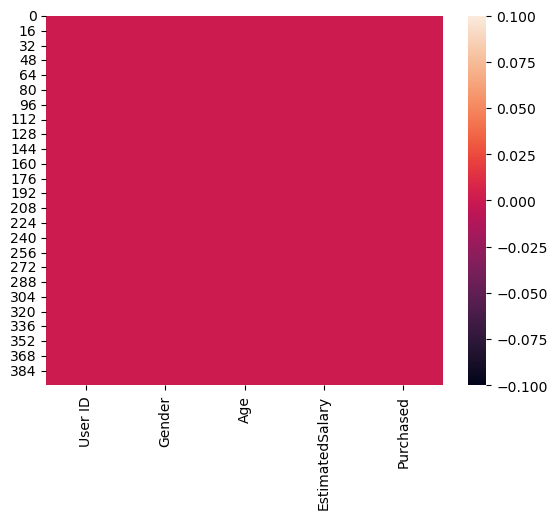

In [146]:
sns.heatmap(data.isnull())

In [160]:
data.drop("User ID",axis=1,inplace=True)

In [161]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

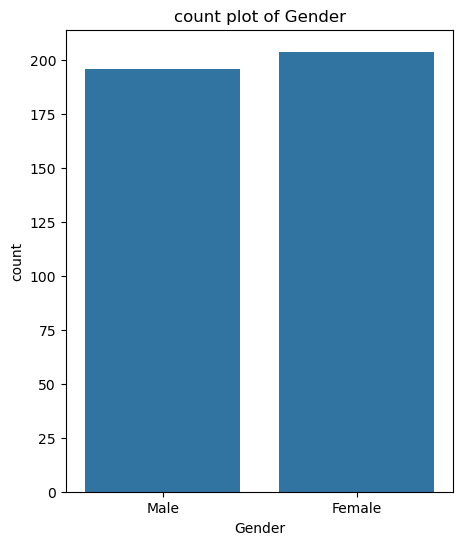

In [149]:
object_col=data.select_dtypes(include="object").columns.to_list()



for col in object_col:
    plt.figure(figsize=(5,6))
    sns.countplot(x=data[col])
    plt.title(f"count plot of {col}")
    plt.show()

In [163]:
data.replace({'Gender': {'Male': 0, 'Female': 1}},inplace=True)


In [165]:
y=data["Purchased"]
x=data.drop(["Purchased"],axis=1)

In [166]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [167]:
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [168]:
#split the data
from sklearn.model_selection import train_test_split

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [171]:
x_train.isnull().sum()
y_train.isnull().sum()


np.int64(0)

In [175]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
y_pred






c:\Users\Dinushi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [179]:
#evaluation of the model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy: .2f}")

Accuracy: 0.87


In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        63
           1       0.83      0.81      0.82        37

    accuracy                           0.87       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.87      0.87       100



In [192]:
import numpy as np

# Input data: (Gender, Age, EstimatedSalary)
input_data = ("Male", 20, 86000)

# Convert Gender to numeric
gender_map = {"Male": 0, "Female": 1}
gender_num = gender_map[input_data[0]]

# Create numpy array with numeric Gender
input_data_as_numpy_array = np.array([gender_num, input_data[1], input_data[2]])

# Reshape for a single instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = model.predict(input_data_reshaped)
print("Raw prediction:", prediction)

# Map prediction to Yes/No
if prediction[0] == 0:
    print("The person did NOT purchase")
else:
    print("The person PURCHASED")


Raw prediction: [0]
The person did NOT purchase


c:\Users\Dinushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


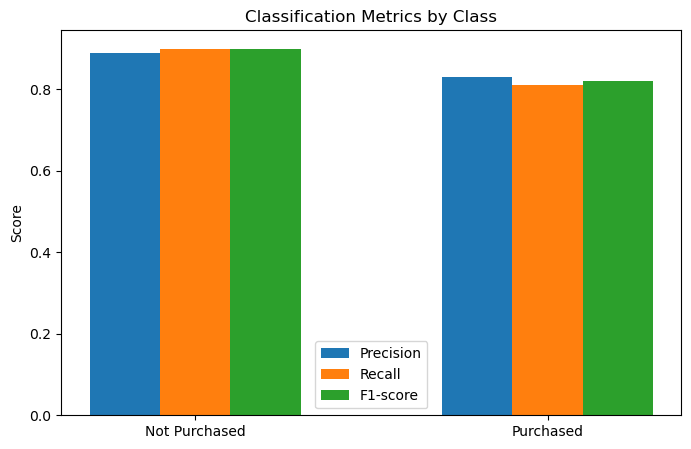

In [193]:
import matplotlib.pyplot as plt

classes = ['Not Purchased', 'Purchased']
precision = [0.89, 0.83]
recall = [0.90, 0.81]
f1 = [0.90, 0.82]

x = range(len(classes))
plt.figure(figsize=(8,5))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([i + 0.2 for i in x], recall, width=0.2, label='Recall', align='center')
plt.bar([i + 0.4 for i in x], f1, width=0.2, label='F1-score', align='center')
plt.xticks([i + 0.2 for i in x], classes)
plt.ylabel('Score')
plt.title('Classification Metrics by Class')
plt.legend()
plt.show()
